In [1]:
using Plots
using Printf
using CovarianceWoodbury
using StatsBase
plotlyjs()

Plots.PlotlyJSBackend()

In [2]:
# data parameter
L = 256 	#length of the signal


# noise 
W = ones(L)	# precision of the i.i.d. noise
rank =  10	# rank of the covariance matrix (minus the diagonal)
U = ones(Float64,L,rank)
for r=1:rank
	U[:,r] =  1 ./r .* sin.(range(0,π*r,L))
end


In [3]:
Cth = WoodburyCovariance(W,U );

In [4]:

Jrng = [10 20 40 80 100 200 500 1000]';
J = length(Jrng)

CerrorRank=zeros(J,rank)
K = 5 # number of evaluation
for p ∈ 1:rank
	Cerror=[]
	j = 0
	for N ∈	Jrng #round.(Int,10 .^(range(1,4,J))) 		# number of realizations for covariance estimation
		j += 1
		mseC = 0.
		if (N+1) < p
			break
		end
		nK = round.(Int,(1000/N)*K)
		for k = 1:nK
			correlated = zeros(L,N)
			for r =1:rank
				correlated .+= U[:,r] *  randn(N)'
			end
			noise = 1 ./ W  .* randn(L,N)  .+  correlated;
			Cest= []
			try 
				Cest = buildCovariance(noise, p)
			catch
				break
			end
			mseC += mean( abs2, Cest .- Cth)
		end
		CerrorRank[j,p] = (mseC / nK)
	end
end


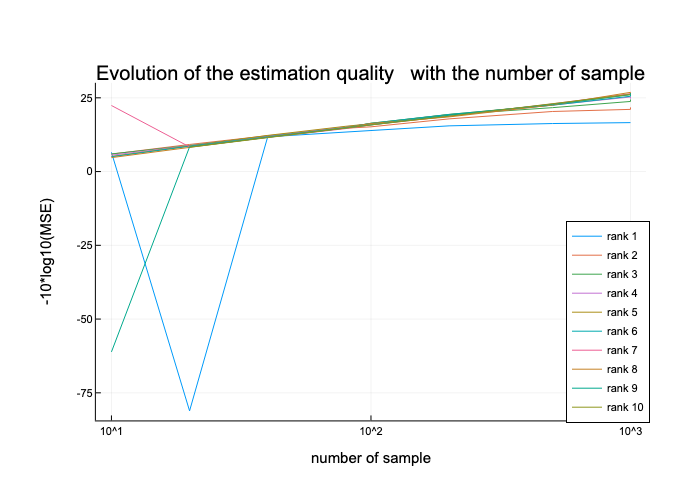

In [36]:
fig = plot(Jrng , -10 * log10.(CerrorRank[:,1]), labels="rank 1", 
	xlabel="number of sample",ylabel="-10*log10(MSE)",legend= :bottomright,
	title="Evolution of the estimation quality \n with the number of sample")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,2]),  xaxis=:log, labels="rank 2")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,3]),  xaxis=:log, labels="rank 3")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,4]),  xaxis=:log, labels="rank 4")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,5]),  xaxis=:log, labels="rank 5")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,6]),  xaxis=:log, labels="rank 6")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,7]),  xaxis=:log, labels="rank 7")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,8]),  xaxis=:log, labels="rank 8")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,9]),  xaxis=:log, labels="rank 9")
plot!(fig,Jrng , -10 * log10.(CerrorRank[:,10]),  xaxis=:log, labels="rank 10")


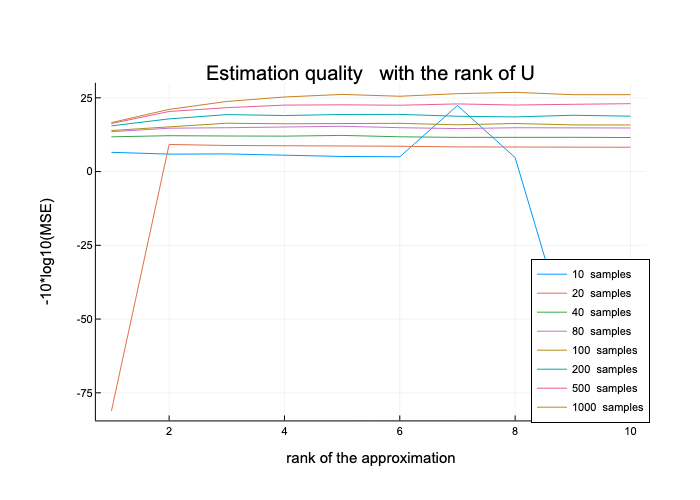

In [64]:
fig2 = plot(1:rank , -10 * log10.(CerrorRank[1,:]),   labels="$(Jrng[1])  samples", legend=:bottomright,
	xlabel="rank of the approximation",ylabel="-10*log10(MSE)",
	title="Estimation quality \n with the rank of U")

	for n=2:(length(Jrng)-1)
		plot!(fig2,1:rank , -10 * log10.(CerrorRank[n,:]),   labels="$(Jrng[n])  samples")
	end
plot(fig2)
	